In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import re
plotly.offline.init_notebook_mode()

In [2]:
print(os.getcwd())

/Users/joelson/Desktop/Scalable


In [3]:
tmax_ts = pd.read_csv('tmax_ts.csv',header= None,sep=',', 
                  names = ["year","tmax"])

In [4]:
tmax_ts = tmax_ts.sort_values(by=['year'])

In [5]:
tmin_ts = pd.read_csv('tmin_ts.csv',header= None,sep=',', 
                  names = ["year","tmin"])

In [6]:
tmin_ts = tmin_ts.sort_values(by=['year'])

In [7]:
tavg_ts = tmax_ts.drop(['tmax'],1)

In [8]:
tavg_ts['tavg'] = (tmax_ts['tmax']+tmin_ts['tmin'])/2

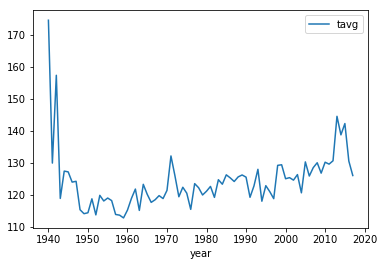

In [9]:
tavg_ts.plot(x='year',y='tavg')

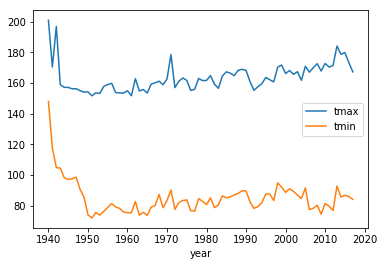

In [10]:
ax = tmax_ts.plot(x='year',y='tmax')

tmin_ts.plot(x='year',y='tmin',ax=ax)

In [11]:
nz_tmax_ts = pd.read_csv('nz_tmax_ts.csv',header= None,sep=',', 
                  names = ["id","year","tmax"])

In [12]:
nz_tmin_ts = pd.read_csv('nz_tmin_ts.csv',header= None,sep=',', 
                  names = ["id","year","tmin"])

In [13]:
nz_temp = nz_tmin_ts

In [14]:
nz_temp['tmax'] = nz_tmax_ts['tmax']

Text(0.5,1,'TMAX & TMIN for NZ Stations')

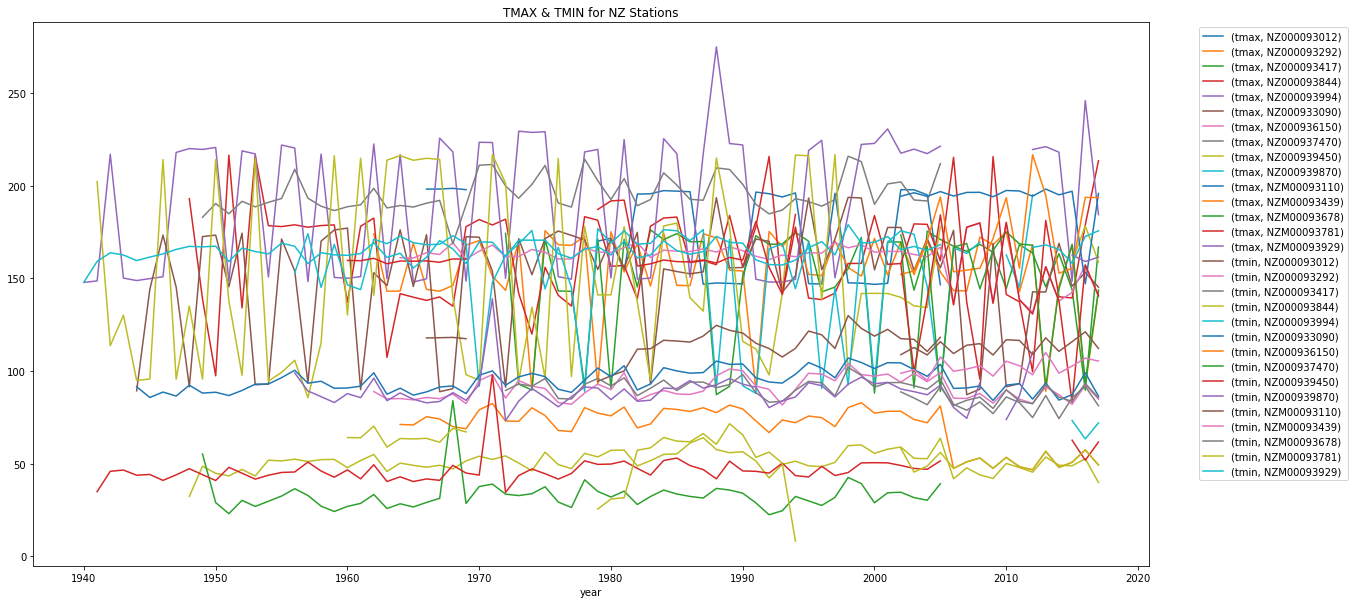

In [15]:
nz_temp.pivot(index="year", columns="id", values=["tmax","tmin"]).plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('TMAX & TMIN for NZ Stations')

Text(0.5,1,'TMAX NZ Stations')

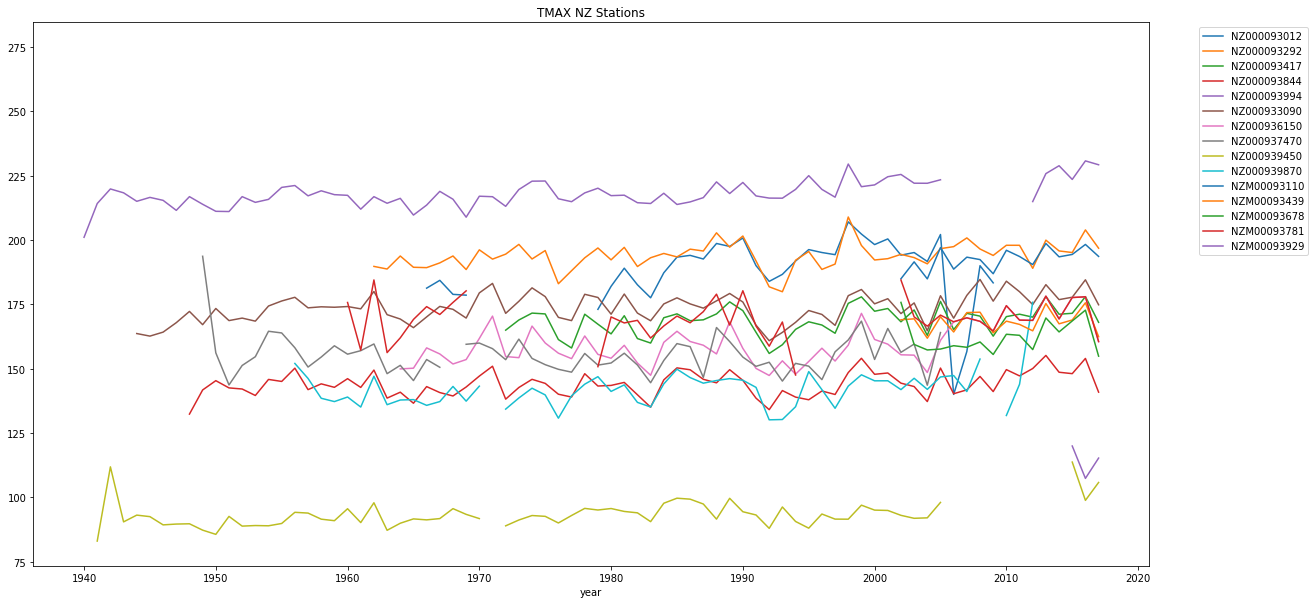

In [16]:
nz_tmax_ts.pivot(index="year", columns="id", values="tmax").plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('TMAX NZ Stations')

Text(0.5,1,'TMIN NZ Stations')

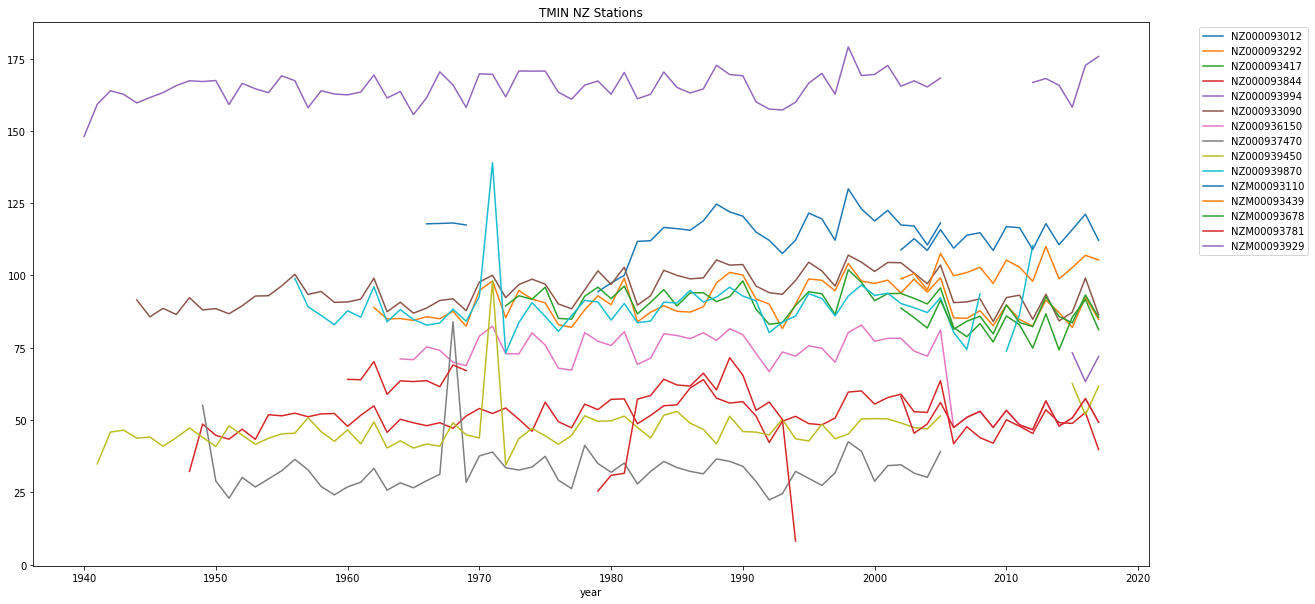

In [17]:
nz_tmin_ts.pivot(index="year", columns="id", values="tmin").plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('TMIN NZ Stations')

In [18]:
rainfall = pd.read_csv('cum_rainfall.csv',header= None,sep=',', 
                  names = ["year","country_code","rainfall","country"])

In [19]:
rainfall = rainfall.sort_values(by=['year'])

In [20]:
rainfall = rainfall.sort_values('rainfall',ascending=False)

In [21]:
rainfall['country'] = rainfall['country'].astype(str).str.replace(r'\[.*?\]','')

In [22]:
rainfall_new = rainfall.drop(['year'],1).drop(['country_code'],1)

In [23]:
rainfall_new = rainfall_new['rainfall'].groupby(rainfall_new['country']).mean()

In [24]:
rainfall_new = rainfall_new.to_frame()

In [25]:
rainfall_new = rainfall_new.reset_index()

In [26]:
data = dict(type='choropleth',
locations = rainfall_new['country'],
locationmode = 'country names', z = rainfall_new['rainfall'],
text = rainfall_new['country'], colorbar = {'title':'Cumulative rainfall'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.001, 'rgb(166,206,227)'], [0.002, 'rgb(31,120,180)'],
            [0.003, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [27]:
layout = dict(title='Cumulative Rainfall',
geo = dict(showframe = True, projection={'type':'Mercator'}))

In [28]:
choromap = go.Figure(data = [data], layout = layout)

In [29]:
iplot(choromap, validate=False)

In [30]:
average_rainfall = pd.read_csv('average_rainfall.csv',header= None,sep=',', 
                  names = ["year","country_code","avg_rainfall","country"])

In [31]:
average_rainfall = average_rainfall.sort_values('avg_rainfall',ascending=False)

In [33]:
average_rainfall = average_rainfall.sort_values('avg_rainfall',ascending=False)

In [34]:
average_rainfall['country'] = average_rainfall['country'].astype(str).str.replace(r'\[.*?\]','')

In [35]:
average_rainfall_new = average_rainfall.drop(['year'],1).drop(['country_code'],1)

In [36]:
average_rainfall_new = average_rainfall_new['avg_rainfall'].groupby(average_rainfall_new['country']).mean()

In [37]:
average_rainfall_new = average_rainfall_new.to_frame()

In [38]:
average_rainfall_new = average_rainfall_new.reset_index()

In [39]:
data = dict(type='choropleth',
locations = average_rainfall_new['country'],
locationmode = 'country names', z = average_rainfall_new['avg_rainfall'],
text = average_rainfall_new['country'], colorbar = {'title':'Avg rainfall'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [40]:
layout = dict(title='Average Rainfall',
geo = dict(showframe = True, projection={'type':'Mercator'}))

In [41]:
choromap = go.Figure(data = [data], layout = layout)

In [42]:
iplot(choromap, validate=False)

In [43]:
daily_temporal = pd.read_csv('daily_temporal.csv',header= None,sep=',', 
                  names = ["year","element","value"])

In [44]:
daily_temporal1 = daily_temporal.loc[(daily_temporal['element'] == 'WSF1') |
                                     (daily_temporal['element'] == 'WSF2') |
                                    (daily_temporal['element'] == 'WSF5') |
                                    (daily_temporal['element'] == 'WSFG') |
                                    (daily_temporal['element'] == 'WSFI') |
                                    (daily_temporal['element'] == 'WSFM')]

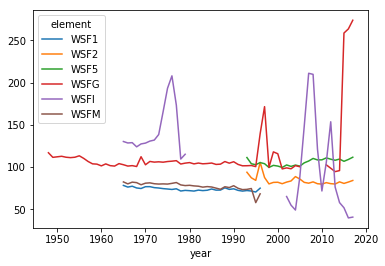

In [45]:
daily_temporal1.pivot(index="year", columns="element", values="value").plot()

In [46]:
daily_temporal2 = daily_temporal.loc[(daily_temporal['element'] == 'ACMH') |
                                    (daily_temporal['element'] == 'ACSH')]

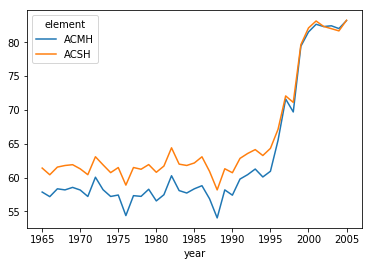

In [47]:
daily_temporal2.pivot(index="year", columns="element", values="value").plot()

In [48]:
daily_global = pd.read_csv('daily_global.csv',header= None,sep=',', 
                  names = ["country_code","element","value"])

In [49]:
country_name = rainfall.drop(['year'],1).drop(['rainfall'],1).drop_duplicates()

In [50]:
country_name['country'] = country_name['country'].astype(str).str.replace(r'\[.*?\]','')

In [51]:
daily_global = daily_global.sort_values('value',ascending=False)

In [52]:
daily_element = daily_global.merge(country_name,how='left', left_on='country_code', right_on='country_code')

In [53]:
daily_element = daily_element.loc[(daily_element.element != 'PRCP') & 
                              (daily_element.element != 'TMAX') &
                             (daily_element.element != 'TMIN') &
                             (daily_element.element != 'SNOW') &
                             (daily_element.element != 'SNWD')]

In [54]:
daily_element.groupby(daily_element['element']).agg(['count']).head(50)

,country_code,value,country
,count,count,count
element,,,
ACMC,1,1,1
ACMH,23,23,23
ACSC,1,1,1
ACSH,26,26,26
AWDR,1,1,1
AWND,23,23,23
DAEV,8,8,8
DAPR,15,15,15


In [55]:
multi_prcp = daily_element.loc[(daily_element['element'] == 'MDPR')]

In [56]:
multi_prcp = multi_prcp.drop(['element'],1).drop(['country_code'],1)

In [57]:
multi_prcp_new = multi_prcp['value'].groupby(multi_prcp['country']).mean()

In [58]:
multi_prcp_new  = multi_prcp_new.to_frame()

In [59]:
multi_prcp_new  = multi_prcp_new.reset_index()

In [60]:
data = dict(type='choropleth',
locations = multi_prcp_new['country'],
locationmode = 'country names', z = multi_prcp_new['value'],
text = multi_prcp_new['country'], colorbar = {'title':'Total Precipitation'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.001, 'rgb(166,206,227)'], [0.002, 'rgb(31,120,180)'],
            [0.003, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [61]:
layout = dict(title='Multiday Precipitation Total',
geo = dict(showframe = True, projection={'type':'Mercator'}))

In [62]:
choromap = go.Figure(data = [data], layout = layout)

In [63]:
iplot(choromap, validate=False)

In [64]:
us_states_fil = pd.read_csv('us_states_fil.csv',header= None,sep=',', 
                  names = ["code","count"])

In [65]:
us_states_fil

,code,count
0,MN,149860
1,WV,106318
2,CT,23409
3,MI,174357
4,NM,163192
5,OR,313116
6,MS,87576
7,NE,146011
8,MD,47239
9,NY,178994


In [66]:
data = dict(type='choropleth',
locations = us_states_fil['code'],
locationmode = 'USA-states', z = us_states_fil['count'],
text = us_states_fil['code'], colorbar = {'title':'No of Failures'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.001, 'rgb(166,206,227)'], [0.002, 'rgb(31,120,180)'],
            [0.003, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [67]:
layout = dict(title='Quality Failures in US',
geo = dict(showframe = True, projection={'type':'Mercator'}))

In [68]:
choromap = go.Figure(data = [data], layout = layout)

In [69]:
iplot(choromap, validate=False)